In [24]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_ids(filename):
    ids = []
    with open(filename) as fin:
        header = True
        for line in fin:
            if header:
                header = False
                continue
            ids.append(int(line))
    return ids

In [3]:
ids = read_ids("cvpr_2019_final_accept_list.txt")

In [4]:
xs, ys = [], []
last, running = 0, 0
for paper_id in ids:
    bin_id = int(paper_id / 100)
    if bin_id != last:
        xs.append(last * 100)
        ys.append(running)
        last = bin_id
        running = 0
    running += 1
xs.append(bin_id * 100)
ys.append(running)

<IPython.core.display.Javascript object>


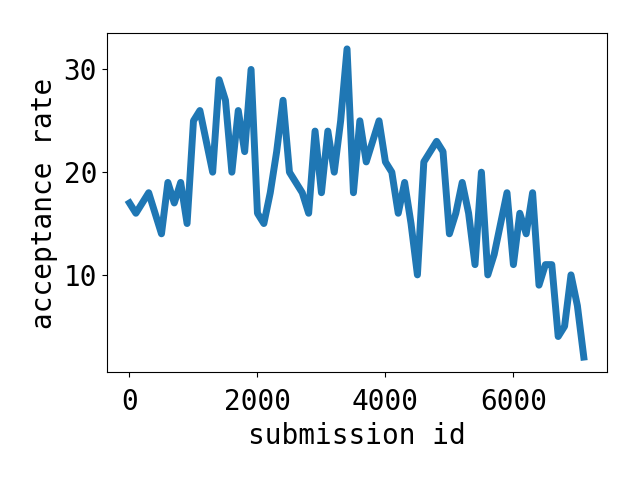

In [29]:
matplotlib.rcParams.update({'font.size': 20, "font.family": "monospace"})
fig, ax = plt.subplots()
ax.plot(xs, ys)
ax.set(ylabel="acceptance rate", xlabel="submission id")
plt.tight_layout()

In [13]:
import statsmodels.api as sm

In [17]:
X = sm.add_constant(xs)
model = sm.OLS(ys, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     27.09
Date:                Tue, 26 Mar 2019   Prob (F-statistic):           1.86e-06
Time:                        11:10:13   Log-Likelihood:                -219.22
No. Observations:                  72   AIC:                             442.4
Df Residuals:                      70   BIC:                             447.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4562      1.202     19.507      0.0